# Project Overview

## Unraveling Waze: Data-Driven Insights to Propel Growth

### Introduction

I explore the complexities of the Waze dataset in this dynamic data analytics research, using strong approaches to obtain insightful knowledge. The main goal is to comprehend and reduce monthly user churn on the Waze app, which is a vital task to support overall growth. Churn, which is determined by users deleting or stopping to use an app, is a crucial indicator that shapes the app's user base and level of happiness.

### Objective

The primary goals are as follows: first, thoroughly explore the dataset using inspection, A/B testing, and exploratory data analysis (EDA). Second, make use of the learned information to create plans that anticipate and prevent user attrition, which will increase user retention and improve customer happiness in general.

### Significant

Beyond only analyzing data, this initiative provides a roadmap for utilizing insights to strengthen Waze's position against its competitors. The objective is to provide Waze with actionable intelligence by analyzing user behavior. This will allow Waze to maintain user retention, improve overall customer satisfaction, and evolve proactively.

Join me as I explore the Waze dataset, revealing narratives concealed within the data, and influencing the direction of user happiness and engagement in the navigation software space going forward.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|label |Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month 	|
|sessions |	The number of occurrence of a user opening the app during the month |
|drives |	An occurrence of driving at least 1 km during the month |
|device |	The type of device a user starts a session with |
|total_sessions |A model estimate of the total number of sessions since a user has onboarded	|
|n_days_after_onboarding |The number of days since a user signed up for the app	|
|total_navigations_fav1 |Total navigations since onboarding to the user’s favorite place 1	|
|total_navigations_fav2 |Total navigations since onboarding to the user’s favorite place 2	|
|driven_km_drives |	Total kilometers driven during the month |
|duration_minutes_drives |	Total duration driven in minutes during the month |
|activity_days |Number of days the user opens the app during the month	|
|driving_days |Number of days the user drives (at least 1 km) during the month	|

## Import libraries and packages

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
sns.set_style('dark')
from matplotlib import pyplot as plt
%matplotlib inline


# Import packages for statistical analysis/hypothesis testing
from scipy import stats

## Import the Dataset

In [2]:
# Load dataset into dataframe
df = pd.read_csv("C:/Users/USER/Desktop/PORTFOLIO PROJECT/Python/Waze App project/waze_dataset.csv")

# Dataset Overview

In [3]:
#check the first 10 rows of the data
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
# Get the shape of the data
df.shape

(14999, 13)

There are 14,999 rows and 13 columns.

In [5]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The variables `label` and `device` are of type `object`; `total_sessions`, `driven_km_drives`, and `duration_minutes_drives` are of type `float64`; the rest of the variables are of type `int64`.

In [6]:
# checking for missing values
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

The dataset has 700 missing values in the `label` column.

### summary statistics
Compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.

In [7]:
# Isolate rows with null values
null_df = df[df['label'].isnull()]
# Display summary stats of rows with null values
null_df.describe() 

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [8]:
# Isolate rows without null values
not_null_df = df[~df['label'].isnull()]
# Display summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


> Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

## Key Insight from dataset overview

- This dataset contains 82% retained users and 18% churned users.

- The dataset contains 12 unique variables with types including objects, floats, and integers; the label column is missing 700 
values with no indication that the omissions are non-random.


========================================================================================================================

# User Behavior Analysis 

##### How many iPhone users had null values and how many Android users had null values?

In [9]:
# Get count of null values by device
null_df['device'].value_counts()

iPhone     447
Android    253
Name: device, dtype: int64

> Of the 700 rows with null values, 447 were iPhone users and 253 were Android users.

In [10]:
# Calculate % of iPhone nulls and Android nulls
null_df['device'].value_counts(normalize=True)

iPhone     0.638571
Android    0.361429
Name: device, dtype: float64

In [11]:
# Calculate % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall.

There is nothing to suggest a non-random cause of the missing data.

##### Examine the counts and percentages of users who churned vs. those who were retained. How many of each group are represented in the data?

In [12]:
# Calculate counts of churned vs. retained
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

retained    11763
churned      2536
Name: label, dtype: int64

retained    0.822645
churned     0.177355
Name: label, dtype: float64


This dataset contains 82% retained users and 18% churned users.

##### compare the medians of each variable for churned and retained users.
the reason for calculating the median and not the mean is that you don't want outliers to unduly affect the portrayal of a typical user.

In [13]:
# Calculate median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


Users who churned averaged 3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove 200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration.

##### Calculate the median kilometers per drive  for both retained and churned users.

In [14]:
# Group data by `label` and calculate the medians
medians_by_label = df.groupby('label').median(numeric_only=True)
print('Median kilometers per drive:')
# Divide the median distance by median number of drives
medians_by_label['driven_km_drives'] / medians_by_label['drives']

Median kilometers per drive:


label
churned     73.053113
retained    73.716694
dtype: float64

The median user from both groups drove ~73 km/drive.

##### How many kilometers per driving day ?

In [15]:
# Divide the median distance by median number of driving days
print('Median kilometers per driving day:')
medians_by_label['driven_km_drives'] / medians_by_label['driving_days']

Median kilometers per driving day:


label
churned     608.775944
retained    247.477472
dtype: float64

The median user who churned drove 608 kilometers each day, which is almost 250% the per-drive-day distance of retained users.The median churned user had a similarly disproportionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data&mdash;and in particular the sample of churned users&mdash;contains a high proportion of long-drive drivers.

##### For each label, calculate the percentage of Android users and iPhone users

In [16]:
# For each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

## Key Insights from User Behavior Analysis

- Churned users averaged ~3 more drives in the last month than retained users.

- Retained users used the app on over twice as many days as churned users in the last month.

- The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

- Churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile; our team will have to continue exploring! 

- The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users.

- Regardless of user churn, the users represented in this data drive a lot! It is probably safe to assume that this data does not represent typical drivers at large.

========================================================================================================================

# EXPLORATORY DATA ANALYSIS

#### Examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`** variable

_The number of occurrence of a user opening the app during the month_

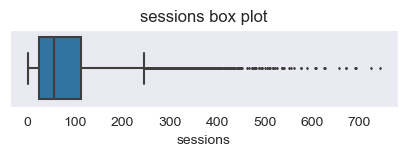

In [17]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot');

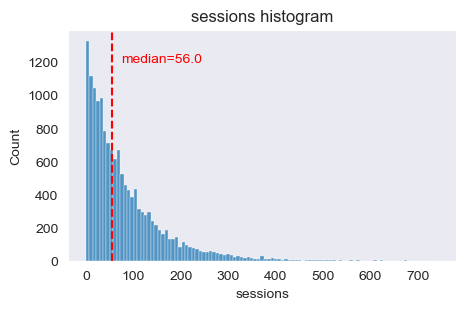

In [18]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions histogram');

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`** variable

_An occurrence of driving at least 1 km during the month_

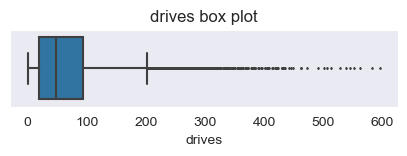

In [19]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot');

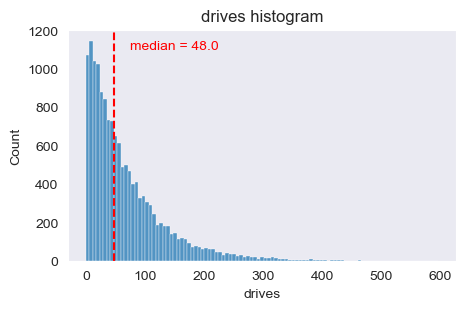

In [20]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['drives'])
median = df['drives'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1100, f'median = {median}', color='red')
plt.title('drives histogram');


The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`** variable

_A model estimate of the total number of sessions since a user has onboarded_

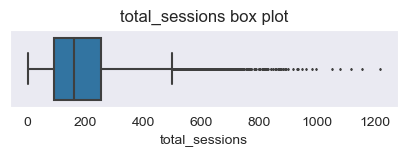

In [21]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

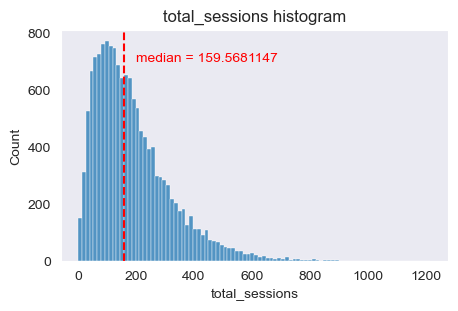

In [22]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['total_sessions'])
median = df['total_sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(200,700, f'median = {median}', color='red')
plt.title('total_sessions histogram');

The `total_sessions` is a right-skewed distribution that looks more normal than the previous variables. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month.

#### **`n_days_after_onboarding`** variable

_The number of days since a user signed up for the app_

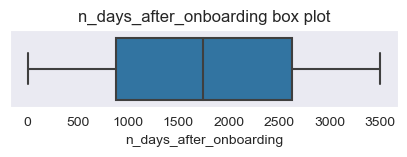

In [23]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

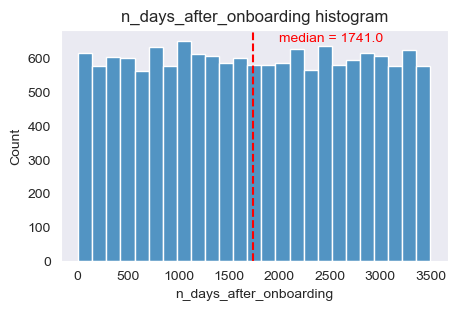

In [24]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['n_days_after_onboarding'])
median = df['n_days_after_onboarding'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(2000,650, f'median = {median}', color='red')
plt.title('n_days_after_onboarding histogram');

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`** variable

_Total kilometers driven during the month_

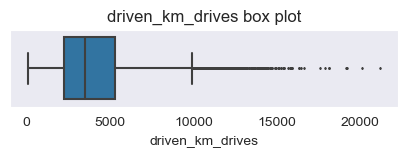

In [25]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

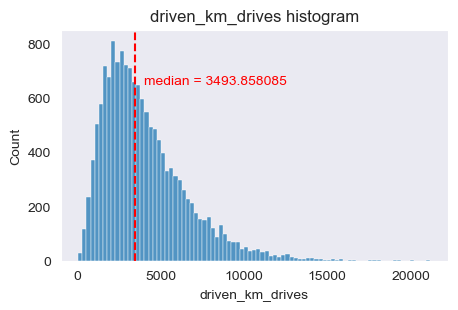

In [26]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['driven_km_drives'])
median = df['driven_km_drives'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(4000,650, f'median = {median}', color='red')
plt.title('driven_km_drives histogram');

The number of drives driven in the last month per user resembles a right-skewed normal distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous analysis, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`** variable

_Total duration driven in minutes during the month_

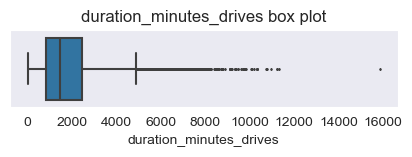

In [27]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

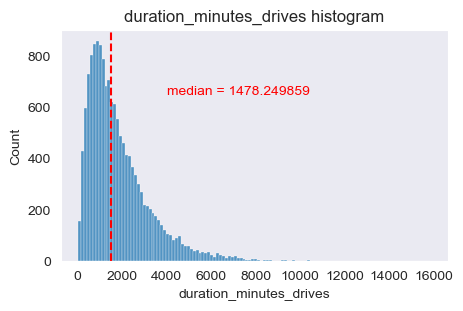

In [28]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['duration_minutes_drives'])
median = df['duration_minutes_drives'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(4000,650, f'median = {median}', color='red')
plt.title('duration_minutes_drives histogram');

The `duration_minutes_drives` variable has a normalish distribution with a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`** variable

_Number of days the user opens the app during the month_

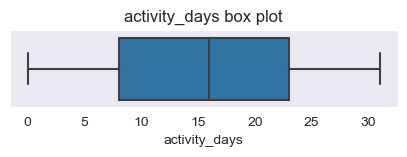

In [29]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');

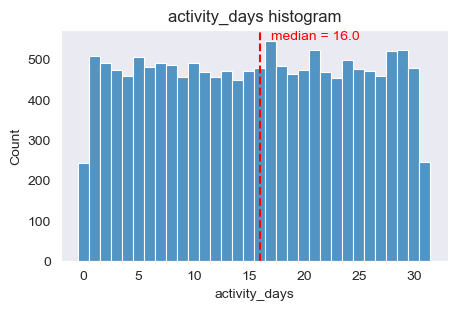

In [30]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['activity_days'], discrete = True)
median = df['activity_days'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(17,550, f'median = {median}', color='red')
plt.title('activity_days histogram');

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

#### **`driving_days`** variable

_Number of days the user drives (at least 1 km) during the month_

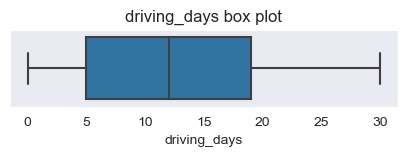

In [31]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

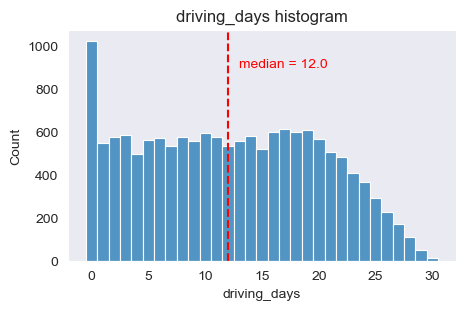

In [32]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['driving_days'], discrete=True)
median = df['driving_days'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(13,900, f'median = {median}', color='red')
plt.title('driving_days histogram');

The number of days users drove each month is almost uniform.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. 


#### **`device`** variable

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

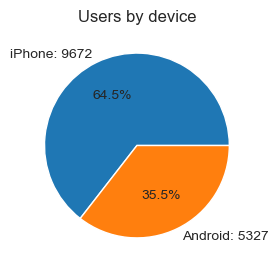

In [33]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`** variable

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

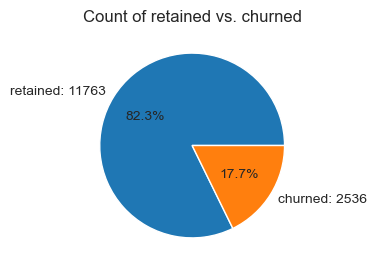

In [34]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`** variable

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `user_days`.

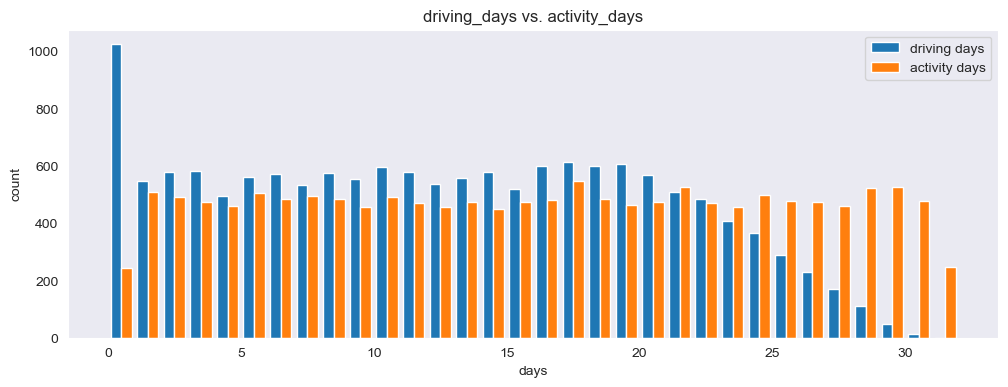

In [35]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

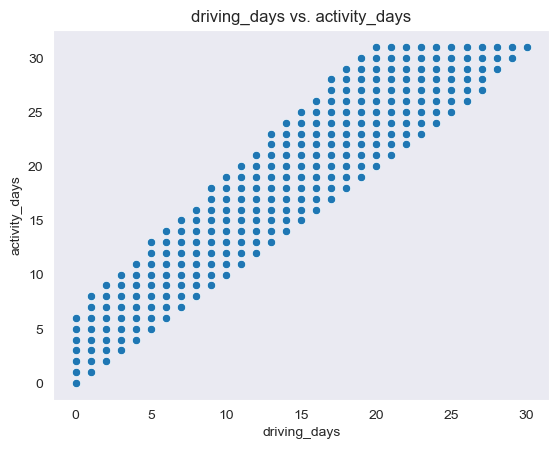

In [36]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days');


If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days.

#### **Retention by device**

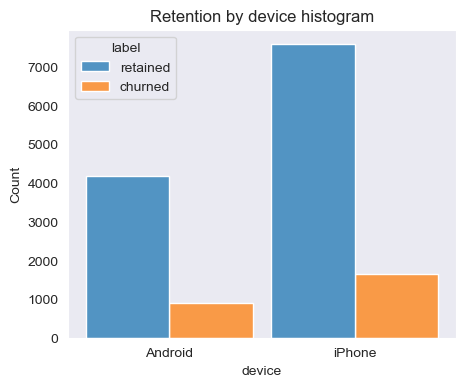

In [37]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Churn rate per number of driving days**

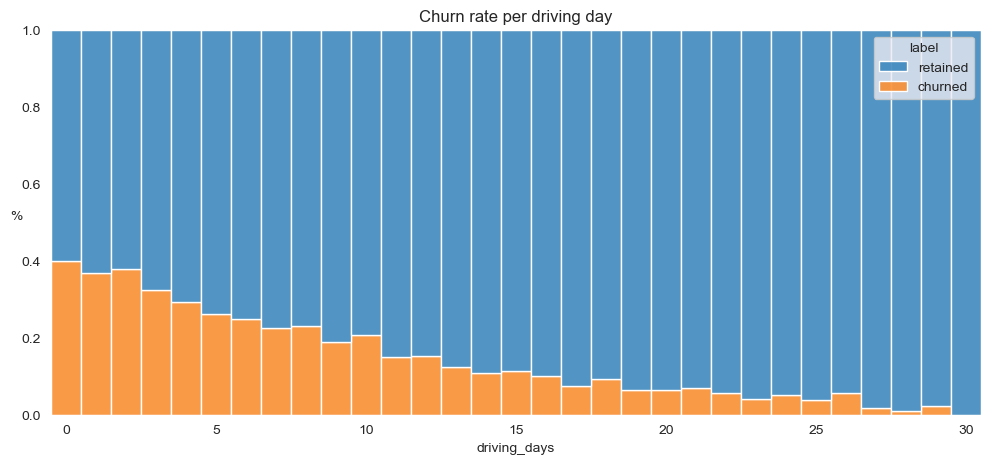

In [38]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app.

Users who drive very long distances on their driving days are more likely to churn, but users who drive more often are less likely to churn.

In [39]:
# # Handling outliers
# def outlier_imputer(column_name, percentile):
#     # Calculate threshold
#     threshold = df[column_name].quantile(percentile)
#     # Impute threshold for values > than threshold
#     df.loc[df[column_name] > threshold, column_name] = threshold

#     print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [40]:
# for column in ['sessions', 'drives', 'total_sessions',
#                'driven_km_drives', 'duration_minutes_drives']:
#                outlier_imputer(column, 0.95)

## KEY INSIGHTS FROM THE EDA

- The more times users used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

- Number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

- Users of all tenures from brand new to ~10 years were relatively evenly represented in the data.

- Nearly all the variables were either very right-skewed or uniformly distributed. 

> For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable.

> For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.

- Several variables had highly improbable or perhaps even impossible outlying values, such as: driven_km_drives, activity_days and driving_days.


========================================================================================================================

# A/B TESTING 

### **Research question:**

#### Do drivers who open the application using an iPhone have the same number of drives on average as drivers who use Android devices?

In [41]:
# 1. Create `map_dictionary`
map_dictionary = {'Android': 2, 'iPhone': 1}

# 2. Create new `device_type` column
df['device_type'] = df['device']

# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

You are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [42]:
df.groupby('device_type')['drives'].mean()

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, we need to conduct a hypothesis test.

### State the hypothesis to be tested 

**Hypotheses:**

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

### Choose a significance level

The **significance level** is the threshold at which you will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. We choose 5% as the significance level 

### Find the p-value

**P-value** refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true. If your p-value is *less than* your significance level of 5% – then you will reject the null hypothesis.

### Conduct a two-sample t-test to compare means

#### `scipy.stats.ttest_ind()`

For a two-sample $t$-test, you can use `scipy.stats.ttest_ind()` to compute your p-value. This function includes the following arguments:

*   `a`: Observations from the first sample. 
*   `b`: Observations from the second sample.
*   `equal_var`: A boolean, or true/false statement, which indicates whether the population variance of the two samples is assumed to be equal. In our example, you don’t have access to data for the entire population, so you don’t want to assume anything about the variance. To avoid making a wrong assumption, set this argument to `False`.

In [43]:
# 1. Isolate the `drives` column for iPhone users.
iPhone = df[df['device_type'] == 1]['drives']

# 2. Isolate the `drives` column for Android users.
Android = df[df['device_type'] == 2]['drives']

# 3. Perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

Ttest_indResult(statistic=1.463523206885235, pvalue=0.143351972680206)

*Since the p-value(0.143351972680206) is larger than the chosen significance level (5%), you fail to reject the null hypothesis. You conclude that there is **not** a statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.*

# Insight from A/B testing

- Based on the calculations, drivers who use an iPhone to interact with the application have a higher number of drives on average. 

- The t-test results concluded there is not a statistically significant difference in mean number of rides between iPhone users and Android users. 


========================================================================================================================

# Recommendations:

#### User Engagement Strategies:

- Develop targeted engagement strategies for users who show signs of increased activity but are still prone to churn.
- Personalized notifications or rewards for frequent users could be used to promote persistent app usage.

#### Understanding Churned User Profiles:

- Conduct in-depth analysis to identify specific user profiles within the churned segment. Understanding their needs and pain points could lead to tailored retention strategies.

#### App Usability Improvements:

- To improve user experience and increase engagement, especially for those who might not be as active, think about improving the app's interface.

#### Data Quality Improvement:

- Address missing values in the label column and investigate the potential impact on analysis results. Ensure data accuracy and completeness for more reliable insights.

#### Regular Communication:

- Establish communication channels to interact with users, informing them about app updates, new features, or providing relevant content to maintain interest and usage frequency.

#### Further A/B Testing:

- While the initial A/B testing didn't reveal a statistically significant difference between iPhone and Android users, continue monitoring user behavior through ongoing A/B testing. Trends might change, and further insights could emerge over time.

=============================================================================================================

# Conclusion

This comprehensive approach aims to not only understand user behavior but also implement targeted strategies to reduce churn and enhance user satisfaction, contributing to the sustained growth of the Waze app. This study provides stakeholders with a solid framework for strategic decision-making, directing initiatives to maximize user happiness and promote long-term growth.